In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


In [3]:
df = pd.read_csv('Global_Pollution_Analysis.csv')
df.isnull().sum()
df.dropna()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,115.84,78.75,42.34,49503.35,81.23,4.85,17.38,4065.66,6.28,92.96,14818.18
196,Bangladesh,2002,121.82,120.97,63.95,74694.68,25.89,46.22,16.56,36905.26,15.18,114.02,59238.04
197,Korea,2011,149.73,146.92,37.04,2818.85,293.27,38.46,38.36,24700.29,14.11,183.06,28895.94
198,Vanuatu,2002,237.20,113.63,101.96,68746.82,305.61,28.82,32.17,1443.62,12.44,40.65,17068.01


In [6]:
# used to take colums wit float and int type
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols

Index(['Year', 'Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index', 'Industrial_Waste (in tons)',
       'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)',
       'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       'GDP_Per_Capita (in USD)'],
      dtype='object')

In [16]:
#standardize the data 
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']
df_data = df[columns_to_scale]
#df_data = pd.DataFrame(df, columns = ['Air_Pollution_Index	','Water_Pollution_Index' ,'Soil_Pollution_Index'])
scaler=StandardScaler()
scaler.fit(df_data)
scaler_data = scaler.transform(df_data)
scaler_df = pd.DataFrame(scaler_data)
scaler_df.columns=['Air_Pollution_Index','Water_Pollution_Index' ,'Soil_Pollution_Index']
scaler_df

,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index
0,1.376167,0.193880,-0.619764
1,-1.403578,-1.153098,1.028744
2,-1.330788,-0.668076,1.142400
3,1.494394,-1.009403,0.431675
4,-0.021926,0.262567,1.138106
...,...,...,...
195,-0.968336,-0.765207,-0.862482
196,-0.878956,0.124351,-0.316683
197,-0.461800,0.671106,-0.996342
198,0.845568,-0.030300,0.643326


In [17]:
from sklearn.preprocessing import LabelEncoder
ls = LabelEncoder()
df['Country'] = ls.fit_transform(df['Country'])
df['Year'] = ls.fit_transform(df['Year'])

In [25]:
df_numerical = df[['CO2_Emissions (in MT)','Industrial_Waste (in tons)']]

mean_value = df_numerical.mean()

median_value = df_numerical.median()

mode_value = df_numerical.mode().iloc[0]

min_value = df_numerical.min()

max_value = df_numerical.max()

standard_deviation = df_numerical.std()

count_value = df_numerical.count()

df_descriptive_data = pd.DataFrame({
    'mean_value' : mean_value,
    'median_value' : median_value,
    'mode_value' : mode_value,
    'min_value' : min_value,
    'max_value': max_value,
    'standard_deviation' :standard_deviation,
    'count_value' : count_value,
})
df_descriptive_data

,mean_value,median_value,mode_value,min_value,max_value,standard_deviation,count_value
CO2_Emissions (in MT),24.8781,25.355,5.30,1.92,49.69,14.470892,200
Industrial_Waste (in tons),52891.6815,55299.150,1019.37,1019.37,99739.36,27224.491690,200


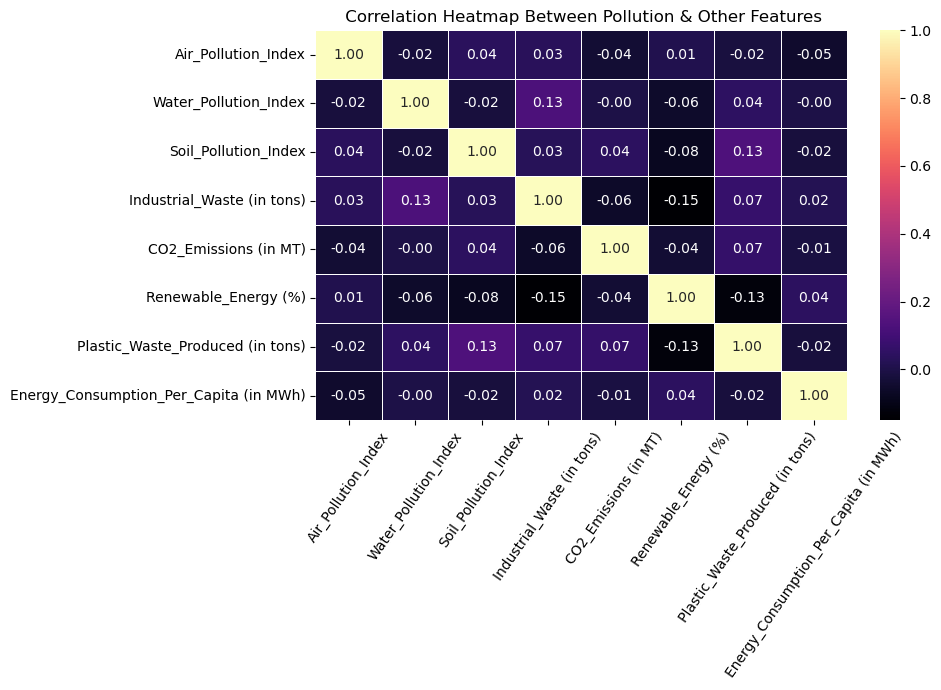

In [32]:
#imort seasborn with sns for heatmapping 

import seaborn as sns
df_columns=['Air_Pollution_Index','Water_Pollution_Index','Soil_Pollution_Index','Industrial_Waste (in tons)' ,'CO2_Emissions (in MT)','Renewable_Energy (%)','Plastic_Waste_Produced (in tons)','Energy_Consumption_Per_Capita (in MWh)']
df_corr = df[df_columns]
corr_mat = df_corr.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_mat, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title(" Correlation Heatmap Between Pollution & Other Features")
plt.xticks(rotation=55)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()





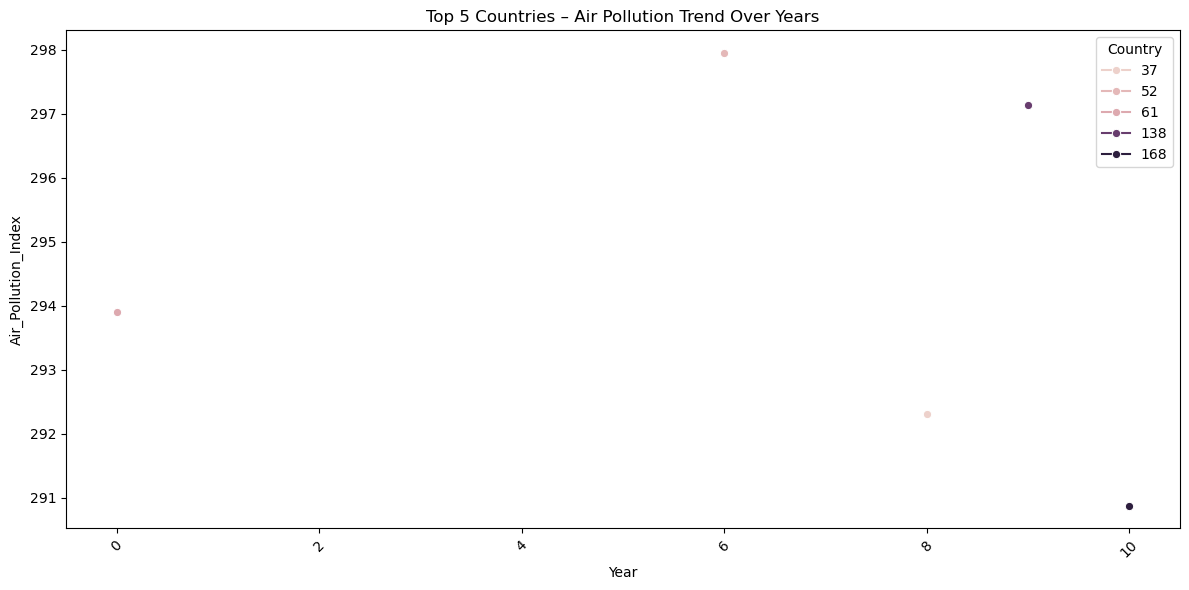

In [52]:
#create a plot for pollution acroos countries 

# Step 1: Average Air Pollution per country
avg_pollution = df.groupby('Country')['Air_Pollution_Index'].mean().sort_values(ascending=False)

# Step 2: Select top 5
top_countries = avg_pollution.head(5).index

# Step 3: Filter data
top_df = df[df['Country'].isin(top_countries)]

# Step 4: Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_df, x='Year', y='Air_Pollution_Index', hue='Country', marker='o')
plt.title("Top 5 Countries – Air Pollution Trend Over Years")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





C:\Users\cdot\AppData\Local\Temp\ipykernel_22924\2017854615.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pollution_year.values, y=avg_pollution_year.index, palette='crest')


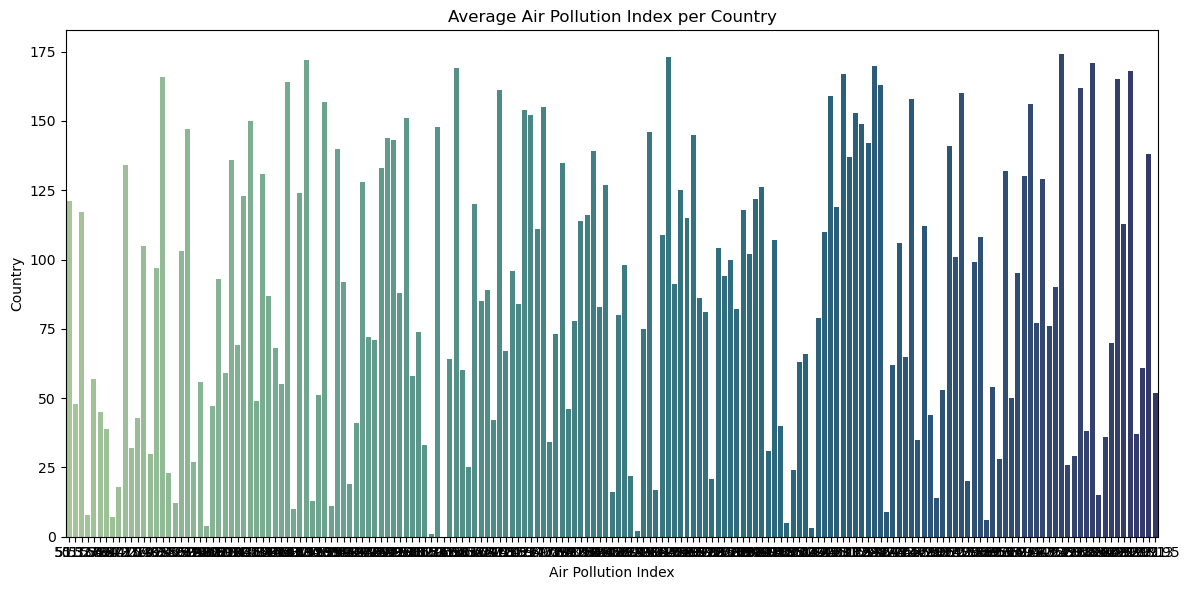

In [39]:
avg_pollution_year = df.groupby('Country')['Air_Pollution_Index'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_pollution_year.values, y=avg_pollution_year.index, palette='crest')
plt.title("Average Air Pollution Index per Country")
plt.xlabel("Air Pollution Index")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


C:\Users\cdot\AppData\Local\Temp\ipykernel_22924\758404140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_df, x='Country', y='Air_Pollution_Index', palette='coolwarm')


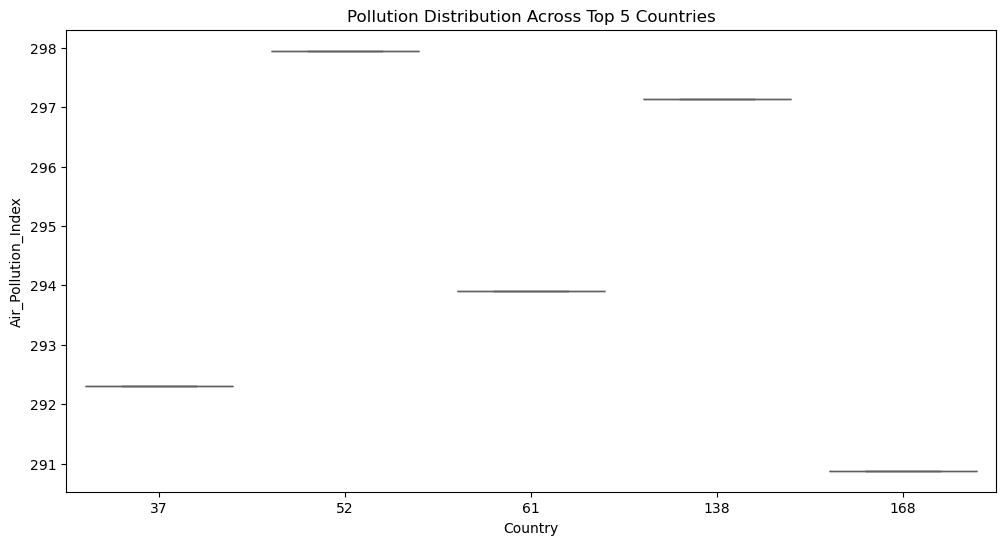

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_df, x='Country', y='Air_Pollution_Index', palette='coolwarm')
plt.title("Pollution Distribution Across Top 5 Countries")
plt.show()


In [46]:
# Group by 'Year' and calculate average of each feature
yearly_trends = df.groupby('Year')[[
    'Air_Pollution_Index', 
    'Water_Pollution_Index', 
    'Soil_Pollution_Index'
]].mean().reset_index()


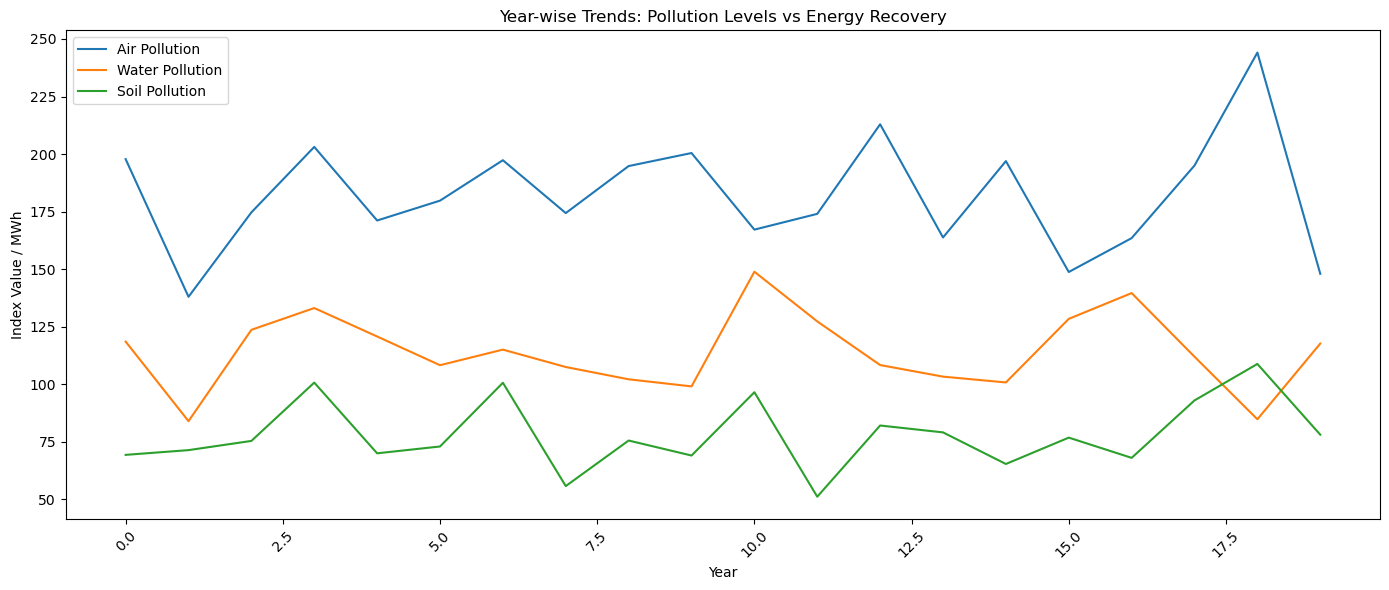

In [47]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_trends, x='Year', y='Air_Pollution_Index', label='Air Pollution')
sns.lineplot(data=yearly_trends, x='Year', y='Water_Pollution_Index', label='Water Pollution')
sns.lineplot(data=yearly_trends, x='Year', y='Soil_Pollution_Index', label='Soil Pollution')

plt.title("Year-wise Trends: Pollution Levels vs Energy Recovery")
plt.ylabel("Index Value / MWh")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [49]:
#enegy per capita 
df[['Country','Year','Energy_Consumption_Per_Capita (in MWh)']]

,Country,Year,Energy_Consumption_Per_Capita (in MWh)
0,77,5,12.56
1,147,1,5.23
2,136,16,13.15
3,38,18,0.78
4,46,8,12.84
...,...,...,...
195,92,4,6.28
196,13,2,15.18
197,88,11,14.11
198,170,2,12.44


In [65]:
# linear regression
#predict energy recovery so it will be y 
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
feature = ['Air_Pollution_Index',
    'Water_Pollution_Index',
    'Soil_Pollution_Index',
    'Industrial_Waste (in tons)']
x = df[feature]
y= df['Energy_Recovered (in GWh)']

x_train , x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

print("r2 score is ", r2_score(y_test,y_pred))
print("mean sqare error is = ", mean_squared_error(y_test,y_pred))
print("mean absolute error is = ", mean_absolute_error(y_test,y_pred))

r2 score is  -0.03028966628878882
mean sqare error is =  20795.45510661535
mean absolute error is =  122.35271941059118


In [66]:
# make pollution level data as low medium and high 

df['pollution_score'] = df[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']].mean(axis = 1)


accuracy is =  0.95
precision is  0.95
recall score is  0.95
f1 score is  =  0.95


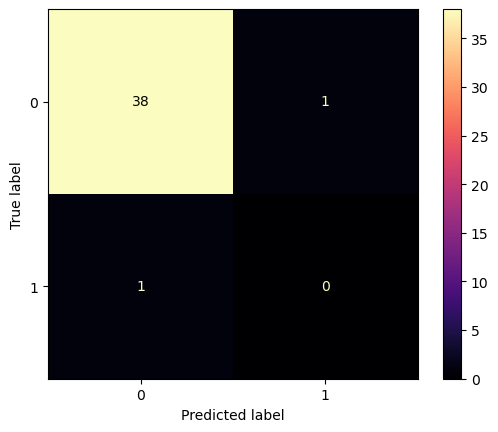

classification report is                precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       0.00      0.00      0.00         1

    accuracy                           0.95        40
   macro avg       0.49      0.49      0.49        40
weighted avg       0.95      0.95      0.95        40



In [101]:
#make fuction to use pollution score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
ls = LabelEncoder()
def pollution_level(score):
    if score<33 :
        return 'low'
    elif score<60:
         return 'medium'    
    else:
        return 'high'

df['pollution_type'] = df['pollution_score'].apply(pollution_level)

df['pollution_label'] = ls.fit_transform(df['pollution_type'])

df_da = ['Air_Pollution_Index','CO2_Emissions (in MT)']

x1=df[df_da]
y1 = df['pollution_label']

x1_train , x1_test , y1_train , y1_test = train_test_split(x1,y1,test_size=0.2)

model = LogisticRegression()
model.fit(x1_train,y1_train)
y1_pred = model.predict(x1_test)

print("accuracy is = ", accuracy_score(y1_test, y1_pred))
print("precision is ", precision_score(y1_test, y1_pred ,average='weighted', zero_division=1))
print("recall score is ",recall_score(y1_test, y1_pred,average='weighted', zero_division=1))
print("f1 score is  = ", f1_score(y1_test, y1_pred,average='weighted', zero_division=1))

cm = confusion_matrix(y1_test,y1_pred)
disp =ConfusionMatrixDisplay(confusion_matrix = cm  )
disp.plot(cmap = 'magma')
plt.show()

print("classification report is ",classification_report(y1_test, y1_pred))




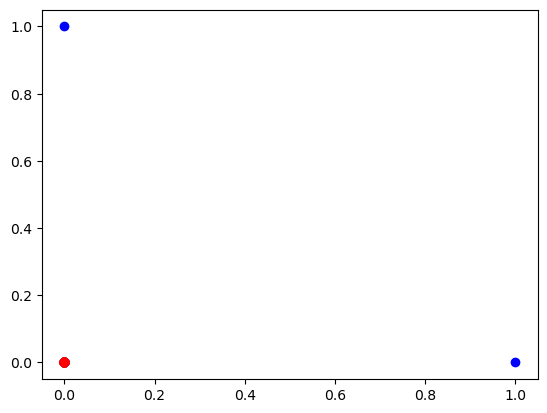

In [100]:
#plt.scatter(x_test,x1_test ,color = 'black' , label = True)
plt.scatter(y_test, y1_test, color='blue')
plt.scatter(y_pred, y1_pred, color='red')

In [114]:
low_energy = df[df['Energy_Recovered (in GWh)']<150]

print(  low_energy[['Country' , 'Energy_Recovered (in GWh)']])

     Country  Energy_Recovered (in GWh)
3         38                     145.18
4         46                      40.38
5         41                     136.26
11       165                     120.54
14       161                      77.26
26       145                      74.57
30        39                     109.13
31       114                      77.67
40       116                      87.44
41       163                      43.23
44        90                     100.23
46       121                      81.31
47        36                      24.45
56        62                      84.46
57        11                     102.09
58       160                      74.46
59       174                      22.84
65        29                     123.15
66       133                      22.78
67        81                      48.94
69        55                      75.70
73       104                     100.15
76        69                      90.26
77       141                     120.87
